<a href="https://colab.research.google.com/github/youngpaper1115/Git_Tutorial/blob/main/Lending_Club_Project_ver1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 import 및 현재 작업공간 확인

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
%matplotlib inline

os.getcwd

<function posix.getcwd>

In [3]:
# 렌딩클럽 raw data에 대한 데이터프레임 생성
lc_df = pd.read_stata('/content/drive/MyDrive/Python_SNU/Lending_Club/lendingclub.dta')

In [4]:
# 컬럼명 확인
lc_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high',
       ...
       'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3',
       'mths_since_recent_revol_delinq4', 'mths_since_recent_revol_delinq5',
       'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7',
       'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9',
       'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11'],
      dtype='object', length=333)

In [5]:
#컬럼 정보 확인을 위해 100개 추출 및 저장

top100 = lc_df.iloc[0:100,:]
top100.to_csv('/content/drive/MyDrive/Python_SNU/Lending_Club/top100.csv',index=False)

In [40]:
lc_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,...,mths_since_recent_bc4,mths_since_recent_bc5,mths_since_recent_bc6,mths_since_recent_bc7,mths_since_recent_bc8,mths_since_recent_bc9,mths_since_recent_bc10,mths_since_recent_bc11,mths_since_recent_bc_dlq1,mths_since_recent_bc_dlq2,mths_since_recent_bc_dlq3,mths_since_recent_bc_dlq4,mths_since_recent_bc_dlq5,mths_since_recent_bc_dlq6,mths_since_recent_bc_dlq7,mths_since_recent_bc_dlq8,mths_since_recent_bc_dlq9,mths_since_recent_bc_dlq10,mths_since_recent_bc_dlq11,mths_since_recent_inq1,mths_since_recent_inq2,mths_since_recent_inq3,mths_since_recent_inq4,mths_since_recent_inq5,mths_since_recent_inq6,mths_since_recent_inq7,mths_since_recent_inq8,mths_since_recent_inq9,mths_since_recent_inq10,mths_since_recent_revol_delinq1,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
count,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,...,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06
mean,1.364630e+04,1.364628e+04,1.364033e+04,1.263927e-01,4.312534e+02,7.562999e+04,1.818105e+01,3.394543e-01,6.942867e+02,6.982868e+02,6.401874e-01,1.157962e+01,2.278147e-01,1.633953e+04,5.311223e-01,2.472208e+01,1.688434e-01,1.688348e-01,1.488750e+04,1.488104e+04,1.221735e+04,2.466102e+03,1.806582e+00,2.022404e+02,3.361854e+01,3.916907e+03,6.790201e+02,6.632270e+02,1.791258e-02,5.880582e-03,2.452099e+02,1.349993e+05,9.476457e-03,1.640168e+01,1.329669e-01,6.108504e-02,6.535251e-02,3.302212e-01,9.019790e-02,7.987692e-02,...,7.996475e-02,1.008492e-01,1.119479e-01,8.370154e-02,1.024037e-01,9.419088e-02,9.277906e-02,9.844279e-02,7.448054e-01,2.708526e-02,2.611904e-02,2.605866e-02,2.619133e-02,2.569358e-02,2.544104e-02,2.352141e-02,2.559476e-02,2.482801e-02,2.466148e-02,1.063400e-01,1.790526e-01,1.525328e-01,6.588777e-02,5.867498e-02,1.023278e-01,8.212777e-02,9.045776e-02,8.048812e-02,8.211039e-02,6.449353e-01,3.838070e-02,3.805314e-02,3.610332e-02,3.453504e-02,3.227595e-02,3.575745e-02,3.779146e-02,3.360908e-02,3.576935e-02,3.278926e-02
std,8.441163e+03,8.441145e+03,8.438033e+03,4.361999e-02,2.652486e+02,8.994245e+04,8.321510e+00,9.065449e-01,3.061425e+01,3.061490e+01,9.343720e-01,5.429423e+00,6.400227e-01,2.264732e+04,2.389062e-01,1.186147e+01,1.768506e+01,1.768472e+01,1.028781e+04,1.028402e+04,8.515152e+03,2.673396e+03

In [42]:
# 결측치 확인

mis_val = lc_df.isnull().sum()
print('데이터의 총 결측치는 ' + str(sum(mis_val)) + '개 입니다.')

데이터의 총 결측치는 0개 입니다.


In [43]:
# 컬럼의 데이터형 개수 확인

lc_df.dtypes.value_counts()

int8       303
float64     16
int32        6
int16        6
float32      2
dtype: int64

In [45]:
# 컬럼별 고유값 개수 확인 및 고유값이 1개 or 2개인 경우의 컬럼명 추출

col_names_1 = []
col_names_2 = []

for col in lc_df.columns.tolist() :
  print(col + ' : ' + str(lc_df[col].nunique()))
  if lc_df[col].nunique() == 1:
    col_names_1.append(col)
  elif lc_df[col].nunique() == 2 :
    col_names_2.append(col)

loan_amnt : 1517
funded_amnt : 1517
funded_amnt_inv : 1570
int_rate : 261
installment : 70654
annual_inc : 55905
dti : 4801
delinq_2yrs : 26
fico_range_low : 38
fico_range_high : 38
inq_last_6mths : 9
open_acc : 81
pub_rec : 37
revol_bal : 78276
revol_util : 1276
total_acc : 138
out_prncp : 180
out_prncp_inv : 180
total_pymnt : 934675
total_pymnt_inv : 814434
total_rec_prncp : 145648
total_rec_int : 456884
total_rec_late_fee : 11756
recoveries : 103849
collection_recovery_fee : 106415
last_pymnt_amnt : 518735
last_fico_range_high : 72
last_fico_range_low : 71
collections_12_mths_ex_med : 16
acc_now_delinq : 8
tot_coll_amt : 12270
tot_cur_bal : 366324
chargeoff_within_12_mths : 10
delinq_amnt : 1887
pub_rec_bankruptcies : 12
tax_liens : 37
emp_length1 : 2
emp_length2 : 2
emp_length3 : 2
emp_length4 : 2
emp_length5 : 2
emp_length6 : 2
emp_length7 : 2
emp_length8 : 2
emp_length9 : 2
emp_length10 : 2
emp_length11 : 2
emp_length12 : 2
home_ownership1 : 2
home_ownership2 : 2
home_ownership3 

In [46]:
print(col_names_1)
print(col_names_2)

['issue_d1', 'issue_d2', 'issue_d3', 'issue_d4', 'issue_d5', 'issue_d6', 'issue_d7', 'issue_d8', 'issue_d9', 'issue_d10', 'issue_d11', 'issue_d12', 'issue_d13', 'issue_d14', 'issue_d15', 'issue_d16', 'issue_d17', 'issue_d18', 'issue_d19', 'issue_d20', 'issue_d21', 'issue_d22', 'issue_d23', 'issue_d24', 'issue_d25', 'issue_d26', 'issue_d27', 'issue_d28', 'issue_d29', 'issue_d30', 'issue_d31', 'issue_d32', 'issue_d33', 'issue_d34', 'issue_d35', 'issue_d36', 'issue_d37', 'issue_d38', 'issue_d39', 'issue_d40', 'issue_d41', 'issue_d42', 'issue_d43', 'issue_d44', 'issue_d45', 'issue_d46', 'issue_d47', 'issue_d48', 'issue_d49', 'issue_d50', 'issue_d51', 'issue_d52', 'issue_d53', 'issue_d54', 'issue_d55', 'issue_d56', 'issue_d57', 'issue_d58', 'issue_d59', 'issue_d60', 'issue_d61', 'issue_d62']
['emp_length1', 'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',

In [47]:
# 종속변수 확인
lc_df['depvar']

0          0.0
1          0.0
2          0.0
3          1.0
4          0.0
          ... 
1092914    0.0
1092915    0.0
1092916    1.0
1092917    1.0
1092918    0.0
Name: depvar, Length: 1092919, dtype: float32

# **<< Column에 대한 생각 정리>>**

1. **loan_amnt**, funded_amnt, funded amnt_inv : 대부분 같은 값으로 loan_amnt 컬럼으로 통일

2. **int_rate** : 이자율.. 유지

3. installment : 대출자의 월 지급액. 총량 / 기간으로 계산되므로 del

4. **annual_inc** : 대출자의 자진신고 연소득.. 유지

5. **dti** : ??? 이해 안감...ㅜㅜ 설명좀.. --> 대출 실질 상환 가능성?? 넣는 것으로. 높으면 위험한 값

6. **delinq_2yrs** : 근 2년간 대출자의 연체 발생일수 30일 이상.. 유지

7. fico_range_low, fico_range_high : 대출자의 FICO 하한&상한 범위? FICO란? 포함시킬 경우, 둘의 평균값 넣는 것이 나을 듯

8. **inq_last_6mths** : 6개월간 조회수.

9. **open_acc** : 신용파일이 열린 수. / 카드 여러개..

10. **pub_rec** : 나쁜 공공기록의 수..? 신용등급이 낮은 경우일 것 같으므로 우선 포함

11. revol_bal, **revol_util** : 리볼빙(광역할부..라 합니다) 금액 및 소비율. 소비율이 낮을수록 연체 비율이 줄지 않을까..? 우선 소비율만 포함

12. **total_acc** : 대출자 신용 파일의 총 신용 한도 수.. 데이터 확인 (open_acc와 비교... total은 현재 신용 계좌수, open은 갚았지만 남아있는 계좌수?? 비교해서 알아볼 것)

13. out_prncp, out_prncp_inv : 잔존 원금들.. 연체면 0이 아닐 것.. 우선 제외 -> 제외 이유는 말할 것. 체크 필요

14. total_pymnt, total_pymnt_inv : 총 지급액.. 원금*이자율 결과물일테니 제외

15. total_rec_prncp, total_rec_int, total_rec_late_fee : 수령한 원금, 이자, 연체료. 원금 및 이자는 불필요. 연체료는 depvar이 0인 경우에 발생하기도 하고, 1인 경우에 발생하지 않은 경우도 있어서.. 제외. late_fee의 경우는 위의 delinq_2yrs 컬럼과 상관성 확인 필요

16. recoveries, **collection_recovery_fee** : 총회복 연기, 추심료 우송..? 개념은 이해 안감. 단, 종속변수가 1인 경우에만 발생(물론 0인 경우도 존재). recoveries를 5.555..로 나눈 값이 collection_recovery_fee 인듯. 뒤 값만 사용 -> 개인 회생 관련 목록이 있으면 제외

17. last_pymnt_amnt : 마지막 받은 총 지급액.. 제외

18. last_fico_range_high, last_fico_range_low : FICO가 대체 뭐람.. 포함시킬 경우 둘의 평균값을 넣자

19. **collections_12_mths_ex_med** : 의료수거 제외 12개월간 수거 횟수..? -> 의료비로 인한 상환 불가 경우 제외하고 채권 회수 건수. Classification에 쓸 수 있을 듯

20. **acc_now_delinq** : 현재 연체 중인 계정 수.. 우선 포함 (loan_amnt 대비율 살펴보기)

21. tot_coll_amt, **tot_cur_bal** : 총 추심 금액 및 모든 계정의 경상 잔액. (cur는 모든 금융권의 남은 대출 잔액. 타금융권의 계좌도 확인 필요)

22. **chargeoff_within_12_mths** : 손실 처리 횟수.

23. **delinq_amnt** : 현재 연체 중인 계좌의 연체 금액. 위에 연체 계정 수가 있으니 우선 제외 -> 금액은 계좌 수와 다른 것이니 추가

24. **pub_rec_bankruptcies** : 공공 파산 기록 건수. -> 상관계수 보고 결정..

25. **tax_liens** : 세금 안내서 압류잡힌거..ㅜ -> 세금이 우선순위이기에 이것이 있으면 상환 못할 확률 높음

26. ***emp_length*** 1 ~ 12 : 고용 기간. 설명에는 0~10까지의 값만을 가진다고 하였지만 column은 12까지 존재. 이 column은 emp_length 하나의 column으로 통일한 후, 각 가능 고용기간을 int로 넣겠음

27. home_ownership 1~6 : 주택 보유 현황.. 이건 종속 변수와의 관계를 봐야할 것 같다. -> 관계 확인 필요

28. verification_status 1~3 : 소득의 확인 여부... 대출자의 신뢰도를 판단하는 기준이 될 수 있을지도? -> 관계 확인 필요

29. purpose 1~14 : 제외

30. addr_state 1~51 : 대출자가 제공한 상태.... 우선 제외

31. initial_list_status : 대출 초기 목록 상태(W : 가조회, F : 본조회) -> 조교님께 물어보기 : 한명한테 빌리냐(W) or 여럿한테 빌리냐(F)

32. elapsed_t : 뭐야 넌 --> 작년엔 사용하지 않은 변수

33. ***issue_d*** 1~118 : 융자금 지원 달.. 우선 int화 
시키기 --> 융자금을 받은 후 지난 일수.. issue_d1의 경우는 579+1일  -> 조교님/께 문의

34. **debt_settlement_flag** : 채무 조정 회사와 협력 여부. 0인 경우 종속변수가 1되는 경우가 몇몇 있는 듯

35. ***term*** : 지불 수. 월 단위로 36 or 60  --> 조교님께 문의

36. **depvar : 종속변수.**

37. *mths_since_last_delinq* 1~11 : 대출자의 마지막 연체 이후 개월 수. 이것도 우선 int화 -> 조교님게 여쭤보기. Delinquent_1인 경우가 바로 저번달 연체 경우가 맞는지?

38. *mths_since_last_major_derog* 1~11: 해석이 잘.. 우선 int화 -> 조교님께 여쭤보기. 90일 또는 그 이상 연체 후 지난 달이 맞는가? 또한 연체가 없었을 경위 derog1으로 처리???

39. ***mths_since_last_record*** 1~11 : 마지막 공공 기록 이후 개월 수? int화

40. ***mths_since_rcnt_il*** 1~11 : 최근 할부 계좌 open 후 월 int화. -> 조교님께 문의..

41. ***mths_since_recent_bc*** 1 ~ 11 : 은행카드 개설 후 지난 월 수. int화

42. ***mths_since_recent_bc_dlq*** 1 ~ 11 : 은행카드 연체 이후 월 수. int화

43. ***mths_since_recent_inq*** 1 ~ 10 : 최근 문의 이후 월 수. int화

44. ***mths_since_recent_revol_delinq*** 1 ~ 11 : 최근 리볼빙 불량 이후 지난 월 수. int화


==> 마지막 변수들 month가 정말 달을 말하는 것인가 or구간을 말하는 것인가? 0이나 11인 경우는 이하or이상의 값까지 볼 것인가

In [6]:
# int로 바꿀 컬럼 list 생성
# int화 시킬 column들 list화
int_column = ['emp_length', 'issue_d', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il',
              'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq']

# raw data의 모든 column을 list화
col_list = lc_df.columns.tolist()

In [7]:
# mths_since_recent_bc 컬럼 텍스트가 겹쳐서... 전체 변환은 나중에 필요하면 진행

# for col in int_column :
#   int_list = list(filter(lambda x: col in x, col_list))
#   int_df = lc_df[int_list]

#   result_list = []

#   for j in range(len(int_df)) :
#     temp_value = 0
#     for i in range(int_df.shape[1]) :
#       temp_value += i*int_df.iloc[j,i]
#     result_list.append(int(temp_value)+1)
  
#   lc_df[col] = result_list
#   lc_df.drop(int_list, axis = 1, inplace = True)

#   print(col + ': 변환 완료') 

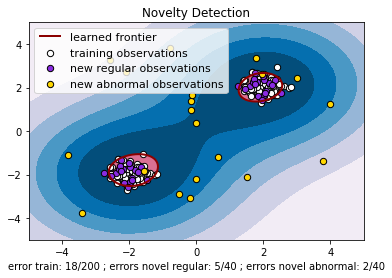

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low = -4, high = 4, size = (20, 2))

# fit the model
clf = svm.OneClassSVM(nu = 0.1, kernel = 'rbf', gamma = 0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title('Novelty Detection')
plt.contourf(xx, yy, Z, levels = np.linspace(Z.min(), 0, 7), cmap = plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, colors = 'darkred')
plt.contourf(xx, yy, Z, levels = [0, Z.max()], colors = 'palevioletred')

s = 40
b1 = plt.scatter(X_train[:,0], X_train[:,1], c = 'white', s = s, edgecolors = 'k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c = 'blueviolet', s =s, edgecolors = 'k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c = 'gold', s = s, edgecolors = 'k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
     'learned frontier',
     'training observations',
     'new regular observations',
     'new abnormal observations',
    ],
    loc = 'upper left',
    prop = matplotlib.font_manager.FontProperties(size = 11),
)
plt.xlabel(
    'error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40'
    %(n_error_train, n_error_test, n_error_outliers)
  
)
plt.show()

In [11]:
# 'emp_length' 컬럼만 변환

int_list = list(filter(lambda x: 'emp_length' in x, col_list))
int_df = lc_df[int_list]

result_list = []

for j in range(len(int_df)) :
  temp_value = 0
  for i in range(int_df.shape[1]) :
    temp_value += i*int_df.iloc[j,i]
  result_list.append(int(temp_value)+1)

int_df['emp_length'] = result_list
# int_df.drop(int_list, axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# 수정된 emp_length 확인
int_df['emp_length']

0          2
1          7
2          2
3          2
4          4
          ..
1092914    2
1092915    9
1092916    1
1092917    6
1092918    2
Name: emp_length, Length: 1092919, dtype: int64

In [ ]:
# emp_length 결과 리스트 텍스트 파일로 저장(임시)

with open('/content/drive/MyDrive/Python_SNU/Lending_Club/emp_length.txt','w') as f:
  for line in result_list:
    f.write(str(line) + ',')

In [ ]:
# emp_length 결과 불러오기

result_list = []

f = open('/content/drive/MyDrive/Python_SNU/Lending_Club/emp_length.txt','r')
numb = f.read()
f.close()

result_list = numb.split(',')
del result_list[-1]

In [ ]:
# raw data에 emp_length 컬럼 추가

lc_df['emp_length'] = result_list

In [14]:
# home_ownership 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'home_ownership' in x, col_list))

In [16]:
temp_list.append('depvar')

In [17]:
temp_list

['home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6',
 'depvar']

In [18]:
temp_df = lc_df[temp_list]

In [19]:
temp_df

,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,depvar
0,0,0,0,0,0,1,0.0
1,0,1,0,0,0,0,0.0
2,0,0,0,0,0,1,0.0
3,0,0,0,0,0,1,1.0
4,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...
1092914,0,1,0,0,0,0,0.0
1092915,0,0,0,0,0,1,0.0
1092916,0,0,0,0,0,1,1.0
1092917,0,0,0,0,0,1,1.0


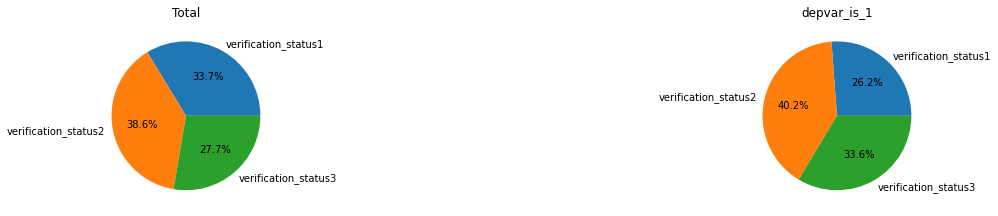

In [27]:
fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

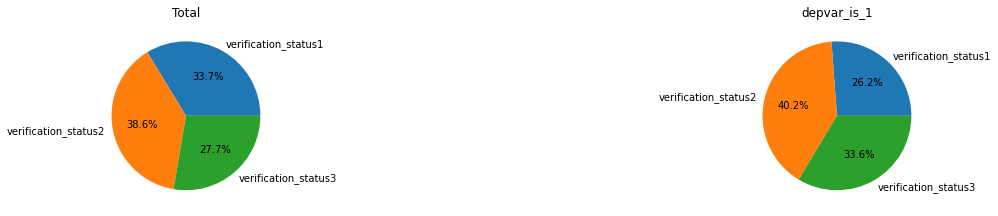

In [28]:
# verification_status 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'verification_status' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

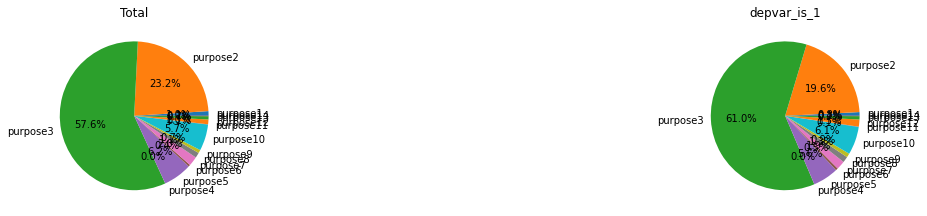

In [29]:
# purpose 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'purpose' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

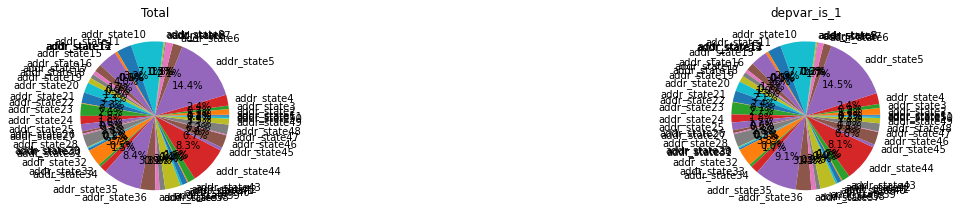

In [30]:
# addr_state 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'addr_state' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

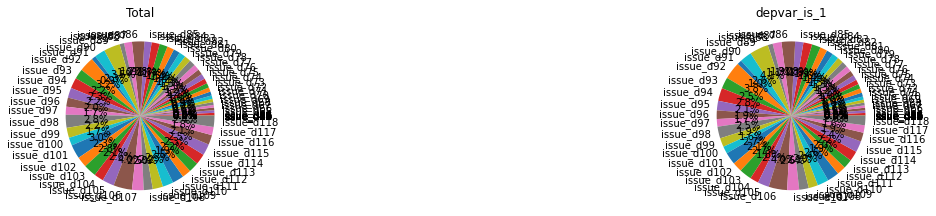

In [31]:
# issue_d 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'issue_d' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

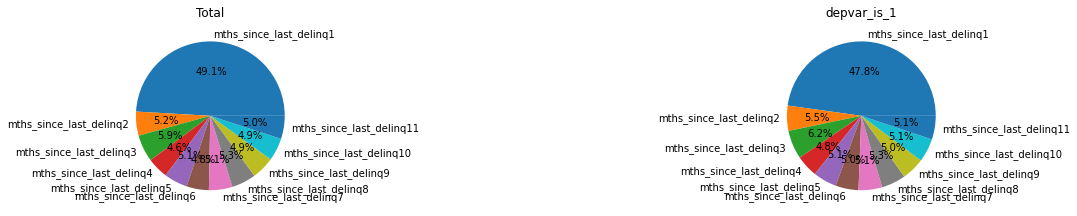

In [32]:
# mths_since_last_delinq 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_last_delinq' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

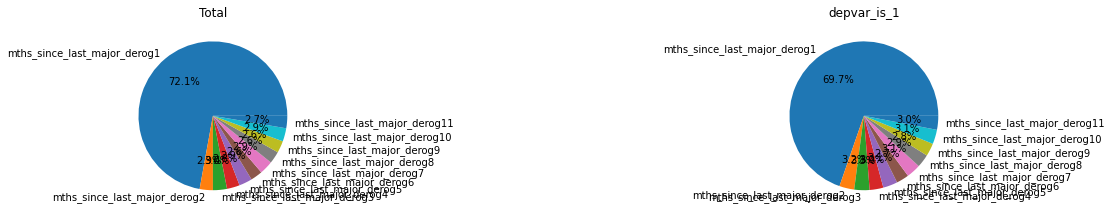

In [33]:
# mths_since_last_major_derog 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_last_major_derog' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

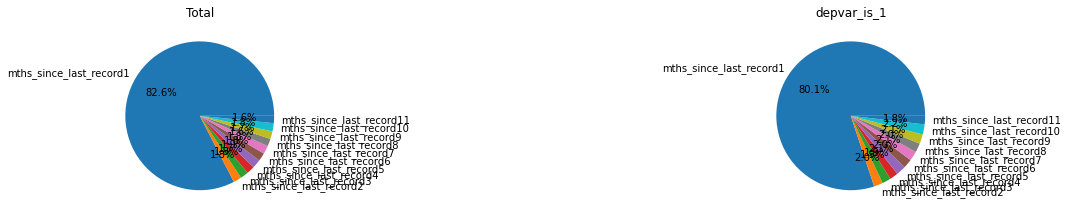

In [34]:
# mths_since_last_record 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_last_record' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

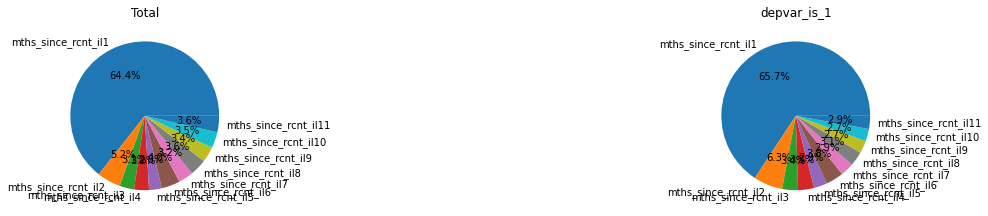

In [35]:
# mths_since_rcnt 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_rcnt' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

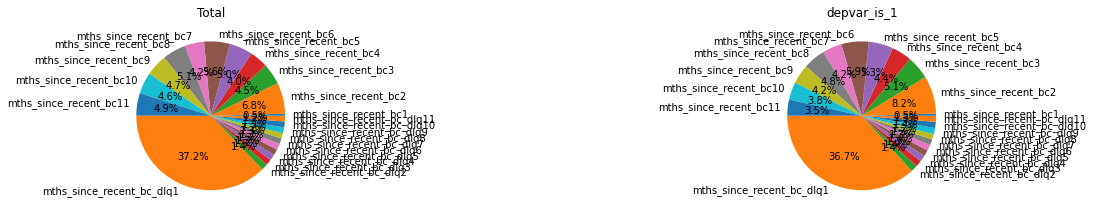

In [36]:
# mths_since_recent_bc 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_recent_bc' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

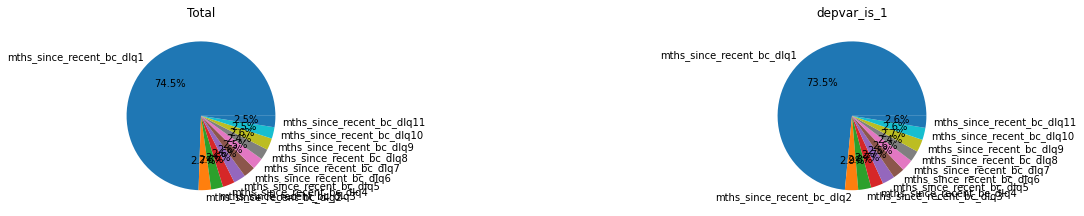

In [37]:
# mths_since_recent_bc_dlq 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_recent_bc_dlq' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

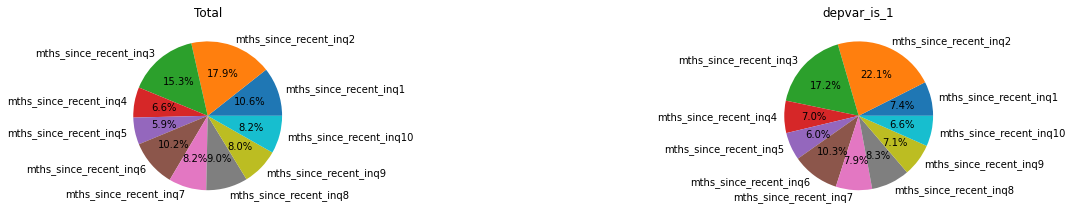

In [38]:
# mths_since_recent_inq 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_recent_inq' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()

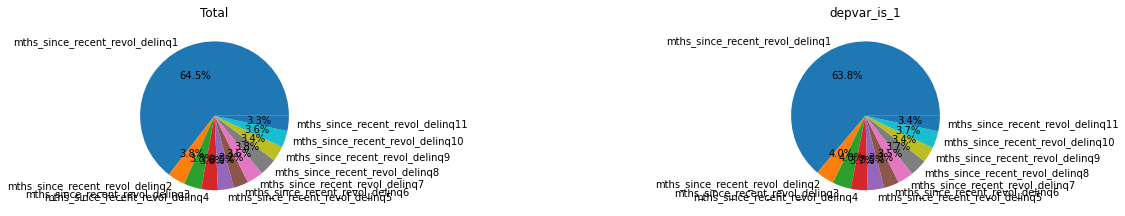

In [39]:
# mths_since_recent_revol_delinq 컬럼과 종속변수와의 관계 살펴보기

temp_list = list(filter(lambda x: 'mths_since_recent_revol_delinq' in x, col_list))
temp_list.append('depvar')
temp_df = lc_df[temp_list]

fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
temp_sum = temp_df.sum(axis = 0)[:-1]
plt.pie(temp_sum.values, labels = temp_sum.index, autopct = '%.1f%%')
plt.title('Total')

plt.subplot(1, 2, 2)
temp_df2 = temp_df[temp_df['depvar'] == 1]
temp_sum2 = temp_df2.sum(axis = 0)[:-1]
plt.pie(temp_sum2.values, labels = temp_sum2.index, autopct = '%.1f%%')
plt.title('depvar_is_1')

plt.subplots_adjust(wspace = 2.5)
plt.show()